<a href="https://colab.research.google.com/github/imjunyoung404/ai-class-3-2/blob/main/DL_classification_breast_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [6]:
X = df.drop(['Rings', 'Sex'], axis=1).values

In [7]:
y = df['Rings'].values

In [9]:
# 필요한 라이브러리 임포트
from keras.utils import to_categorical  # to_categorical 함수 임포트

# y 데이터를 원-핫 인코딩
y_categorical = to_categorical(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=0)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # 클래스 수만큼 유닛 설정

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1945 - loss: 2.5905 - val_accuracy: 0.2093 - val_loss: 2.1208
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2524 - loss: 2.0506 - val_accuracy: 0.2751 - val_loss: 1.9848
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2842 - loss: 1.9722 - val_accuracy: 0.2608 - val_loss: 2.0176
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2709 - loss: 1.9675 - val_accuracy: 0.2560 - val_loss: 2.0280
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2648 - loss: 1.9726 - val_accuracy: 0.2751 - val_loss: 1.9865
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2696 - loss: 1.9350 - val_accuracy: 0.2751 - val_loss: 2.0186
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2814 - loss: 1.9721 - val_accuracy: 0.2775 - val_loss: 1.9896
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2785 - loss: 1.9564 - val_accuracy: 0

In [18]:
y_pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [19]:
import numpy as np
y_pred_class = np.argmax(y_pred, axis=1)

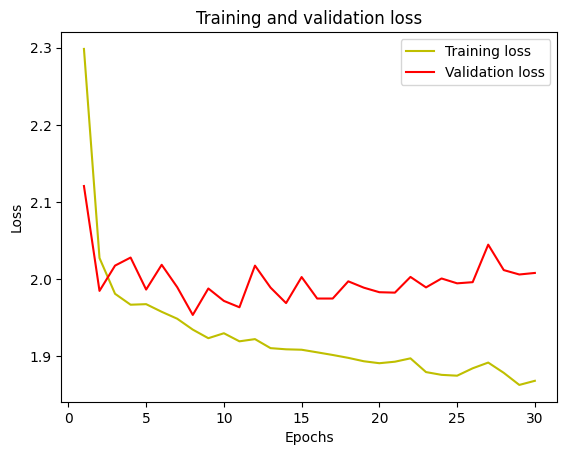

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

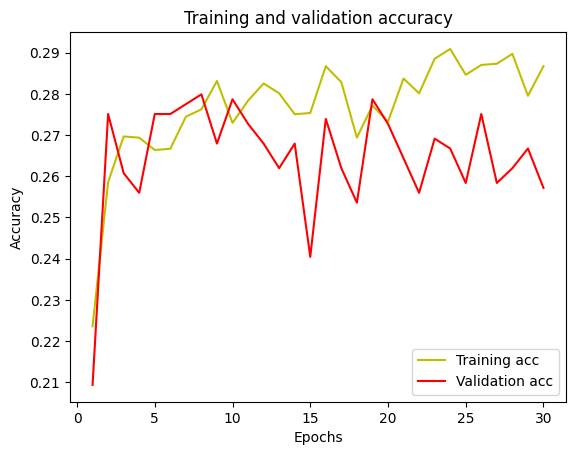

In [21]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 원-핫 인코딩된 y_test를 정수형 클래스로 변환
y_test_class = np.argmax(y_test, axis=1)

# y_pred도 마찬가지로 정수형 클래스로 변환
y_pred_class = np.argmax(y_pred, axis=1)

# 분류 보고서 및 혼동 행렬 출력
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.20      0.36      0.26        11
           5       0.28      0.15      0.20        33
           6       0.32      0.49      0.38        47
           7       0.34      0.34      0.34        98
           8       0.35      0.30      0.33       113
           9       0.28      0.36      0.32       127
          10       0.20      0.39      0.27       107
          11       0.24      0.21      0.22        95
          12       0.33      0.03      0.06        66
          13       0.11      0.13      0.12        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.05      0.07      0.06        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
          20       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
